In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! ls

measurments.csv		      summarize_morphometric_data.ipynb
seaborn_pairwise_kdeplot.png  total_dataset.csv


Just want to see what this data looks like first

In [3]:
df = pd.read_csv("measurments.csv")

In [4]:
df.shape

(249, 19)

In [5]:
df.dtypes

BC_number           object
Collection_Code     object
Species             object
Caste               object
HW                 float64
HL                 float64
SL                 float64
EL                 float64
FL                 float64
ML                 float64
PL                 float64
PPL                float64
GL                 float64
CI                 float64
EI                 float64
SI                 float64
FLI                float64
WL                 float64
TL                 float64
dtype: object

lets tighten up some of those headers

In [6]:
df = df.rename(columns={
    'BC_number' : 'sample',
    'Collection_Code' : 'coll',
    'Species' : 'spp',
    'Caste' : 'caste',
})

In [7]:
df.dtypes

sample     object
coll       object
spp        object
caste      object
HW        float64
HL        float64
SL        float64
EL        float64
FL        float64
ML        float64
PL        float64
PPL       float64
GL        float64
CI        float64
EI        float64
SI        float64
FLI       float64
WL        float64
TL        float64
dtype: object

In [8]:
df.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,249.000000,249.000000,248.000000,249.000000,248.000000,249.000000,249.00000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,249.000000,249.000000
mean,1.225884,1.036398,1.058308,0.254075,0.723100,1.867973,0.47639,0.280662,1.323394,118.446889,25.268973,87.555732,58.086844,0.757052,5.000920
std,0.217018,0.179328,0.105142,0.063120,0.198075,0.263260,0.12487,0.047924,0.294790,5.972296,8.496119,7.884132,9.239841,0.164697,0.809419
min,0.817000,0.620000,0.788000,0.165000,0.302000,1.441000,0.29700,0.197000,0.947000,102.778000,17.647000,71.186000,32.432000,0.535000,3.843000
25%,1.094000,0.954000,1.010750,0.198000,0.674750,1.667000,0.39100,0.253000,1.100000,113.889000,20.008000,80.673750,58.949000,0.636000,4.413000
50%,1.159000,1.014000,1.042000,0.242000,0.716000,1.798000,0.45200,0.268000,1.183000,118.000000,21.951000,90.000000,61.237000,0.726000,4.669000
75%,1.377000,1.155000,1.126000,0.282000,0.845000,2.023000,0.50700,0.304000,1.577000,121.875000,25.000000,92.444500,63.063000,0.817000,5.409000
max,1.690000,1.408000,1.279000,0.396000,1.098000,2.543000,0.87300,0.451000,2.084000,140.741000,48.276000,103.448000,68.867000,1.267000,7.153000


In [9]:
print(df['coll'].nunique())

47


In [10]:
df['spp'].nunique()

2

In [11]:
print(df.groupby('coll')['caste'].nunique())

coll
HDFL12052010-14        2
HDFL19052010-8         2
HDFL28052010-04 ch1    1
HDFL28052010-05        1
JTL                    2
KG110502-12            1
KG110505-02            2
KG110505-04            1
KG110506-06            1
KG110507-02            1
KG110507-04            1
KG110510-01            3
KG110511-02            1
KG110512-01            3
KG110512-01A           3
KG110513-01            1
KG110513-03            1
KG110513-04            1
KG110513-05            1
KG110513-20            1
KG110515-01            3
KG110515-01A           1
KG110515-01B           1
KG110515-02B           2
KG110515-03            2
KG110515-05            1
KG110515-06            1
KG110515-08            2
KG110515-09            3
KG110520-03            3
KG110520-06            1
KG110520-09            2
KG110520-11            1
KG110520-12            2
KG110520-13            1
KG110520-14            1
KG111505-03            1
RMMA050727-06          1
RMMA050816-04          1
RMMA050818-05       

We know there are two species, represented by castes. We need to subset this df into fov_w, fov_q, fov_m, zet_w...ect. and get stats on the total colonies for each subset!<br>
IE- how many colonies (coll) did we sample zeteki queens (gynes) from?

First, drop any rows with NA's

In [12]:
df=df.dropna(how='any')

In [13]:
len(df)

247

filter our df/subset based on the value of spp (fovouros or zeteki)

In [14]:
is_fovouros = df['spp']=="fovouros"
is_zeteki = df['spp']=="zeteki"

now use these boolean variables to fitler the df

In [15]:
fov = df[is_fovouros]
zet = df[is_zeteki]

do the same for each caste

In [16]:
is_fov_W = fov['caste']=="Worker"
is_zet_W = zet['caste']=="Worker"
is_fov_G = fov['caste']=="gyne"
is_zet_G = zet['caste']=="gyne"
is_fov_M = fov['caste']=="male"
is_zet_M = zet['caste']=="male"

In [17]:
fov_w = fov[is_fov_W]
zet_w = zet[is_zet_W]
fov_g = fov[is_fov_G]
zet_g = zet[is_zet_G]
fov_m = fov[is_fov_M]
zet_m = zet[is_zet_M]

# summarize and describe these new dataframes

### fovouros workers

colony count

In [18]:
print(fov_w.groupby('coll')['caste'].nunique())
len(fov_w.groupby('coll')['caste'].nunique())

coll
HDFL12052010-14        1
HDFL28052010-04 ch1    1
HDFL28052010-05        1
JTL                    1
KG110502-12            1
KG110505-02            1
KG110505-04            1
KG110506-06            1
KG110507-02            1
KG110511-02            1
KG110513-01            1
KG110513-03            1
KG110513-04            1
KG110513-05            1
KG110513-20            1
KG110515-01B           1
KG110515-02B           1
KG110515-08            1
KG110515-09            1
KG110520-03            1
KG110520-09            1
KG110520-11            1
RMMA050727-06          1
RMMA100511-02          1
RMMA100519-01          1
RMMA100519-04          1
Name: caste, dtype: int64


26

In [19]:
fov_w.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.121969,0.982905,1.029001,0.200269,0.693906,1.651804,0.409977,0.253622,1.094394,114.242247,20.376885,91.716800,61.835398,0.663599,4.392747
std,0.044046,0.046395,0.047365,0.013756,0.036141,0.077554,0.051027,0.017770,0.053789,3.521645,1.236200,2.423955,1.865663,0.056771,0.179091
min,1.012000,0.825000,0.904000,0.165000,0.620000,1.441000,0.310000,0.225000,0.947000,102.778000,17.647000,87.805000,57.540000,0.551000,3.843000
25%,1.098000,0.961000,1.001000,0.197000,0.676000,1.605000,0.367000,0.242000,1.052000,112.288000,19.444000,90.244000,60.811000,0.619000,4.280000
50%,1.124000,0.986000,1.029000,0.198000,0.693000,1.658000,0.396000,0.253000,1.098000,114.286000,20.000000,91.566000,61.585000,0.660000,4.393000
75%,1.155000,1.014000,1.046000,0.209000,0.713700,1.710000,0.452000,0.266000,1.130000,116.374000,21.212000,92.426000,62.633000,0.706000,4.522000
max,1.215000,1.116000,1.197000,0.230000,0.810000,1.911000,0.549000,0.292800,1.197000,123.529000,22.857000,100.172000,68.867000,0.841800,4.785000


### zeteki workers

colonies sampled

In [20]:
print(zet_w.groupby('coll')['caste'].nunique())
len(zet_w.groupby('coll')['caste'].nunique())

coll
HDFL19052010-8    1
JTL               1
KG110510-01       1
KG110512-01       1
KG110512-01A      1
KG110515-01       1
KG110515-03       1
KG110515-05       1
KG111505-03       1
RMMA050816-04     1
RMMA050818-05     1
RMMA1000624-28    1
RMMA100629-23     1
WEBER             1
Name: caste, dtype: int64


14

In [21]:
zet_w.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.419043,1.162614,1.154596,0.253989,0.848250,1.952673,0.476402,0.293091,1.238430,122.061135,21.858514,81.476665,59.747014,0.769493,5.194836
std,0.095873,0.075742,0.061398,0.018626,0.069192,0.131186,0.055750,0.031832,0.099693,2.841577,1.046276,2.306976,2.035384,0.078237,0.411154
min,1.207800,1.012000,1.040000,0.207000,0.713700,1.665300,0.368000,0.221000,1.043100,115.789474,17.949000,77.441406,55.319000,0.589000,4.508000
25%,1.345250,1.098000,1.108500,0.242000,0.795000,1.877000,0.440000,0.274375,1.155000,120.000000,21.317869,79.956250,58.633977,0.735750,4.897500
50%,1.426000,1.155000,1.155000,0.253000,0.845000,1.943000,0.479000,0.291500,1.246000,121.525500,21.971500,81.132000,59.837500,0.760500,5.137000
75%,1.489000,1.228575,1.208000,0.266500,0.903750,2.051000,0.496050,0.310000,1.305950,123.649500,22.529500,82.577000,60.982750,0.794750,5.440750
max,1.602000,1.321000,1.279000,0.286000,1.001000,2.248000,0.614400,0.384000,1.517000,127.727000,24.324000,86.957000,67.229000,0.998400,6.541500


### fovouros gynes

In [22]:
print(fov_g.groupby('coll')['coll'].nunique())
len(fov_g.groupby('coll')['coll'].nunique())

coll
KG110507-04     1
KG110515-02B    1
KG110515-06     1
KG110515-08     1
KG110515-09     1
KG110520-03     1
KG110520-06     1
KG110520-09     1
KG110520-12     1
Name: coll, dtype: int64


9

In [23]:
fov_g.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.294857,1.132333,1.031333,0.265762,0.832333,2.025000,0.590714,0.305905,1.574286,114.367857,23.474762,79.653286,64.255000,0.896619,5.627857
std,0.026744,0.018451,0.022533,0.016544,0.018203,0.044579,0.074395,0.032436,0.034344,2.134307,1.455580,2.177204,0.959517,0.071473,0.115559
min,1.267000,1.098000,0.986000,0.231000,0.803000,1.915000,0.366000,0.253000,1.464000,112.195000,20.008000,73.469000,63.043000,0.676000,5.266000
25%,1.274000,1.126000,1.014000,0.253000,0.817000,1.999000,0.563000,0.282000,1.549000,112.500000,22.500000,78.261000,63.265000,0.873000,5.618000
50%,1.295000,1.126000,1.042000,0.253000,0.831000,2.028000,0.591000,0.310000,1.577000,114.634000,23.077000,80.000000,64.444000,0.901000,5.660000
75%,1.295000,1.155000,1.042000,0.282000,0.845000,2.056000,0.648000,0.310000,1.605000,115.000000,25.000000,80.435000,65.217000,0.930000,5.688000
max,1.380000,1.155000,1.070000,0.282000,0.873000,2.112000,0.704000,0.394000,1.633000,119.512000,25.000000,84.444000,65.934000,1.014000,5.773000


### zeteki gynes

In [24]:
print(zet_g.groupby('coll')['coll'].nunique())
len(zet_g.groupby('coll')['coll'].nunique())

coll
JTL              1
KG110510-01      1
KG110512-01      1
KG110512-01A     1
KG110515-01      1
KG110515-01A     1
KG110515-03      1
KG110520-14      1
RMMA110515-01    1
Name: coll, dtype: int64


9

In [25]:
zet_g.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.636542,1.36175,1.208792,0.374917,1.055375,2.468917,0.765292,0.384250,1.959458,120.220750,27.545208,73.865125,64.480667,1.149542,6.939625
std,0.045453,0.03947,0.032111,0.017318,0.037350,0.064970,0.089934,0.026111,0.080166,2.270563,1.210001,1.247363,1.295554,0.095969,0.229261
min,1.462000,1.25800,1.110000,0.333000,0.925000,2.272000,0.539000,0.338000,1.656000,116.000000,25.510000,71.186000,62.069000,0.886000,6.071000
25%,1.633000,1.35200,1.186000,0.366000,1.042000,2.456750,0.704000,0.366000,1.955250,118.654250,26.531000,72.881000,63.280250,1.098000,6.906000
50%,1.643000,1.37100,1.211000,0.366000,1.070000,2.478000,0.789500,0.381000,1.971000,120.408000,27.083000,74.044000,64.407000,1.177500,6.994000
75%,1.661000,1.38000,1.239000,0.394000,1.070000,2.506000,0.834500,0.399500,1.999000,121.037000,28.644750,74.576000,65.517000,1.228500,7.070750
max,1.690000,1.40800,1.243000,0.396000,1.098000,2.543000,0.873000,0.424000,2.084000,126.667000,29.167000,75.949000,67.241000,1.267000,7.153000


### fovouros males

In [26]:
print(fov_m.groupby('coll')['coll'].nunique())
len(fov_m.groupby('coll')['coll'].nunique())

coll
HDFL12052010-14    1
KG110505-02        1
KG110515-09        1
KG110520-03        1
KG110520-12        1
Name: coll, dtype: int64


5

In [27]:
fov_m.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.838500,0.686333,0.827333,0.294444,0.314000,1.788111,0.360278,0.234000,1.458611,122.257778,42.887167,98.683500,37.446833,0.594278,4.527611
std,0.014193,0.022927,0.021282,0.013764,0.010627,0.057213,0.022323,0.015511,0.134587,3.781497,1.931729,2.475692,1.314601,0.030273,0.158913
min,0.817000,0.620000,0.788000,0.282000,0.302000,1.671000,0.334000,0.197000,1.239000,115.385000,40.000000,93.548000,35.484000,0.535000,4.196000
25%,0.831000,0.676000,0.817000,0.282000,0.310000,1.765750,0.338000,0.225000,1.380000,120.000000,41.667000,96.667000,36.667000,0.566500,4.477000
50%,0.845000,0.683000,0.819000,0.285000,0.310000,1.788000,0.365500,0.225000,1.436000,122.449000,41.987500,98.319000,36.760500,0.591000,4.534000
75%,0.845000,0.702750,0.845000,0.310000,0.310000,1.830000,0.366000,0.250500,1.513750,125.000000,44.673500,100.000000,37.931000,0.619000,4.615250
max,0.873000,0.732000,0.873000,0.310000,0.338000,1.859000,0.394000,0.253000,1.746000,131.818000,45.833000,103.448000,40.000000,0.647000,4.759000


### zeteki males

In [28]:
print(zet_m.groupby('coll')['coll'].nunique())
len(zet_m.groupby('coll')['coll'].nunique())

coll
HDFL19052010-8    1
KG110510-01       1
KG110512-01       1
KG110512-01A      1
KG110515-01       1
Name: coll, dtype: int64


5

In [29]:
zet_m.describe()

,HW,HL,SL,EL,FL,ML,PL,PPL,GL,CI,EI,SI,FLI,WL,TL
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.028316,0.786158,1.002053,0.363684,0.371000,2.005632,0.485368,0.276526,1.678263,130.858526,46.294421,97.461947,36.109789,0.761895,5.231895
std,0.033121,0.026951,0.051131,0.011662,0.017736,0.105516,0.064485,0.024570,0.109204,4.068060,1.707027,3.948625,1.910164,0.074614,0.224155
min,0.957000,0.746000,0.929000,0.338000,0.338000,1.830000,0.338000,0.253000,1.577000,125.862000,42.857000,86.842000,32.432000,0.591000,4.900000
25%,1.014000,0.760000,0.957000,0.365500,0.366000,1.929000,0.453500,0.253000,1.605000,127.586000,44.828000,95.782500,35.135000,0.732000,5.097000
50%,1.042000,0.788000,1.014000,0.366000,0.366000,1.999000,0.479000,0.282000,1.633000,131.034000,46.429000,97.297000,35.135000,0.760000,5.210000
75%,1.042000,0.817000,1.042000,0.366000,0.376500,2.084000,0.507000,0.282000,1.703500,132.143000,48.074000,100.000000,37.653000,0.789000,5.280000
max,1.070000,0.817000,1.098000,0.394000,0.411000,2.225000,0.591000,0.338000,1.999000,140.741000,48.276000,102.703000,39.452000,0.929000,5.829000


In [30]:
df.dtypes

sample     object
coll       object
spp        object
caste      object
HW        float64
HL        float64
SL        float64
EL        float64
FL        float64
ML        float64
PL        float64
PPL       float64
GL        float64
CI        float64
EI        float64
SI        float64
FLI       float64
WL        float64
TL        float64
dtype: object

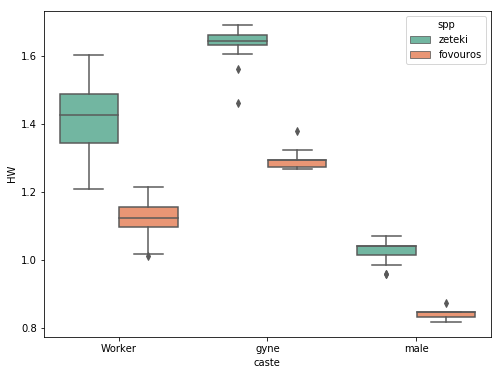

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="caste",y="HW",hue="spp",data=df,palette="Set2");

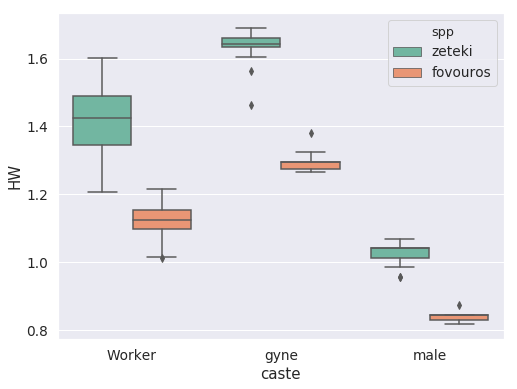

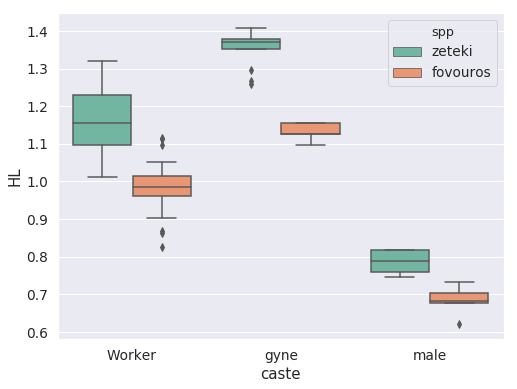

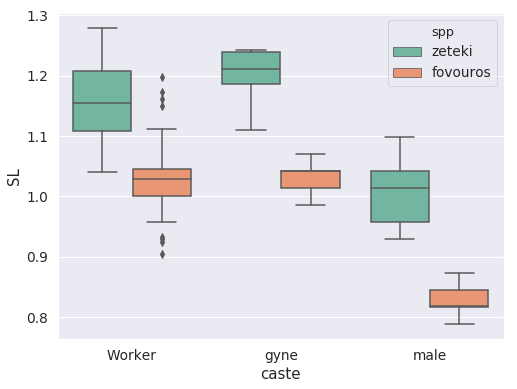

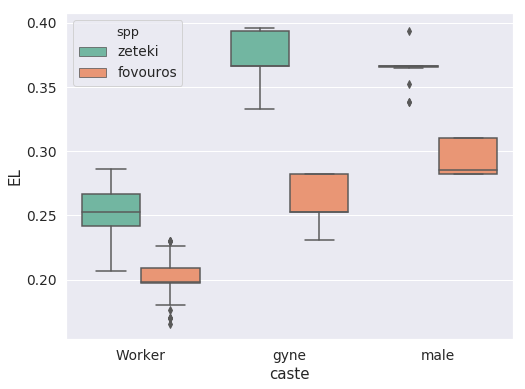

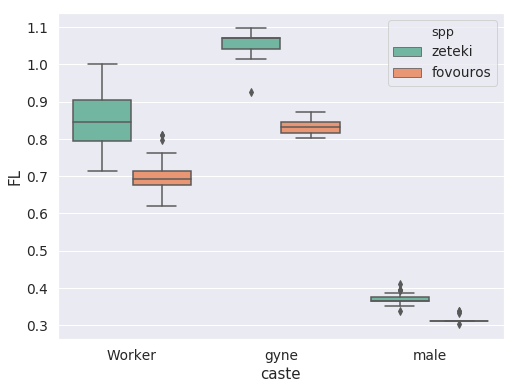

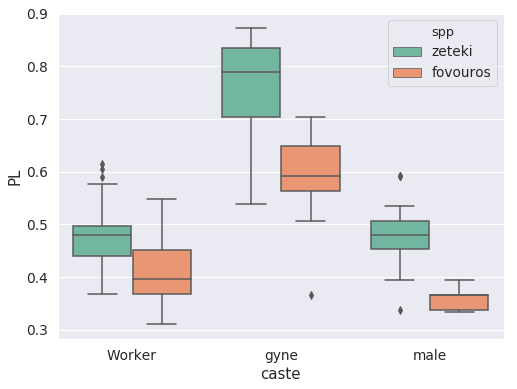

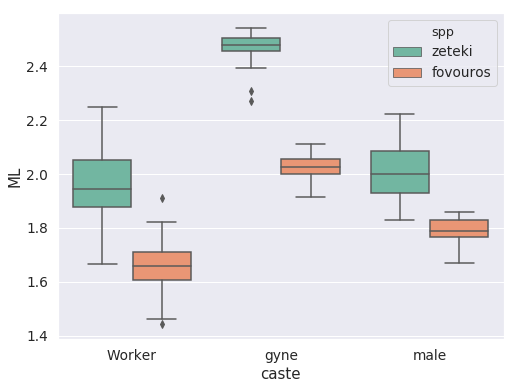

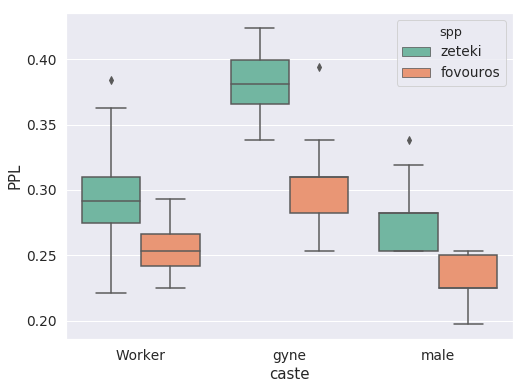

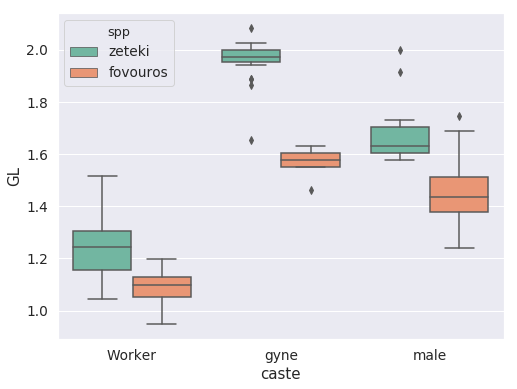

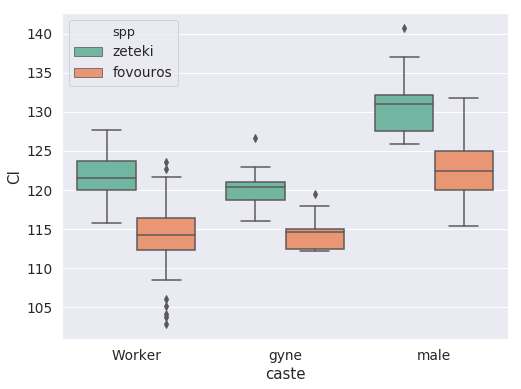

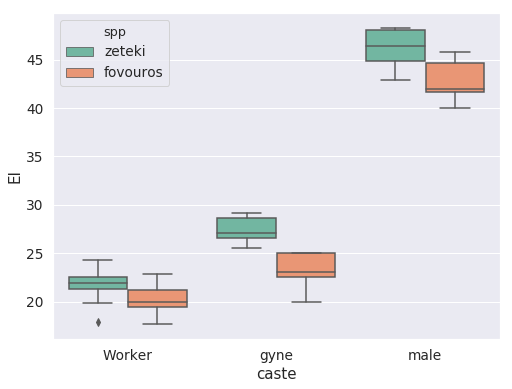

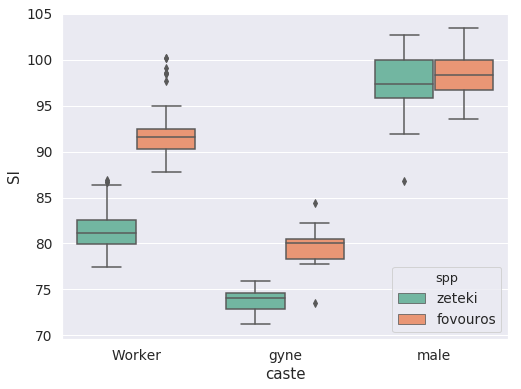

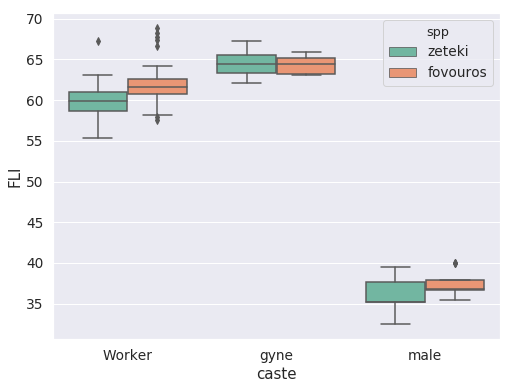

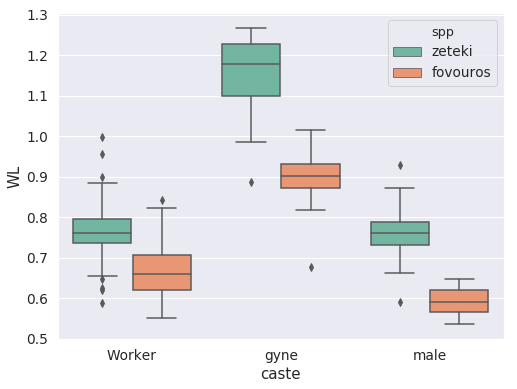

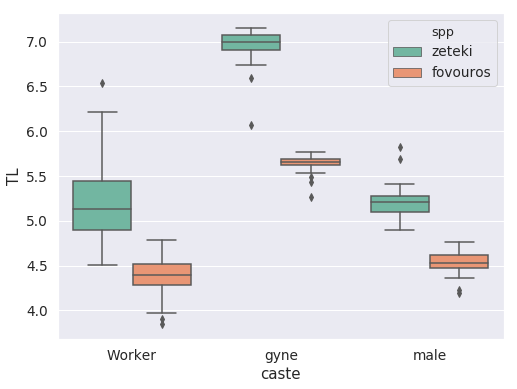

In [38]:
list = ['HW', 'HL', 'SL', 'EL', 'FL',
        'PL', 'ML', 'PPL', 'GL', 'CI',
        'EI', 'SI', 'FLI', 'WL', 'TL']
for v in list:
    plt.figure(figsize=(8, 6))
    sns.set(font_scale = 1.25)
    sns.boxplot(x="caste",y=v ,hue="spp",data=df,palette="Set2")

## Ignore these save for later

import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,2,5])
plt.show()
plt.plot(df['hw'])
plt.show()

dfg = sns.PairGrid(df)
dfg.map_diag(sns.kdeplot)
dfg.map_offdiag(sns.kdeplot);

sns.distplot(df['hw'],hist=False,rug=True)
plt.title('All Headwidths');

sns.jointplot(x=fov['hw'],y=zet['hw'])